# LABORATORIO: ELIMINACION DE ANOMALIAS DE LA IMAGEN.

### IDENTIFACIÓN OBJETIVOS.
El fin de este laboratorio es el de familiarizar al alummnado con las técnicas y herramientas de procesado de imagen. Para ello, se han identificado los siguientes objetivos a tratar:

¿Qué anomalía se va a tratar?.
Identificación de una solución general.
Evaluación de dicha solución.
Plasmar los resultados en un Notebook.

### REQUISITOS NOTEBOOK.
Antes de empezar con el Notebook, se van a definir los siguientes apartados que dicho Notebook debe reflejar:

Nombre de los integrantes.
Asistencia a las reuniones, conforme a la tabla Excel y que se aporta como anexo a este Notebook.
Descripción del problema.
2 ó más imágenes con la anomalía a tratar.
Solución propuesta.
Ejecución comentada del algoritmo empleado.

### NOMBRE DE LOS INTEGRANTES.
Los integrantes de este equipo quedan referidos en el siguiente apartado:

Alberto Jiménez Sánchez.
Iñigo Blázquez Tatiegi.
Luis García Tíscar.
Guillermo Botana Novillo-Fertrell.

### ASISTENCIA A LAS REUNIONES.
Tras la primera reunión, la cual data del lunes 28 de diciembre, los integrantes de este equipo han acordado abordar las imágenes con la anomalía conocida como el "ruido de sal y pimienta".

Al finalizar la primera reunión, los integrantes acuerdan celebrar una nueva reunión el lunes 3 de enero de 2021 para realizar un seguimiento del trabajo a realizar.

### DESCRIPCION DEL PROBLEMA

Antes de describir el ruido de sal y pimienta, se van a dar unas breves pautas que introducirán este tipo de ruido.

Se define el ruido como toda señal no deseada y de naturaleza aleatoria que modifica la intensidad de la señal original a percibir. Para el caso que concierne a este laboratorio, las cámaras fotográficas captan la luz y la convierten en una señal eléctrica de naturaleza digital. Por tanto, el ruido afecta a esta señal eléctrica.(TEMA 4. 4.2 Entropía: concepto y estimación.)

Las señales eléctricas se en afectadas por diferentes tipos de ruido. Estos tipos de ruido son (TEMA 4 4.3 Fuentes perturbadoras de las señales.):

Externos al sistema.
Internos al sistema.
Es dentro de los ruidos externos al sistema donde se localiza el ruido de sal y pimienta, o ruido impulsivo o shot. Este tipo de ruido se produce normalmente en la cuantificación que se realiza en el proceso de digitalización de la imagen.

Por lo tanto, a la hora de tratar este ruido se van a emplear filtros digitales. Estos filtros se pueden clasificar en (http://alojamientos.us.es/gtocoma/pid/tema3-1.pdf):

Filtros en el dominio del espacio.
Filtros en el dominio de la frecuencia.
Dentro de los filtros en el dominio del espacio , existen dos tipos de filtros:

Filtros lineales.
Filtros no lineales.
Serán los filtros no lineales los que previsiblemente darán una mejor solución para este tipo de anomalía. Dentro de los filtros no lineales, y que aborden el ruido de sal y pimienta, se encuentran los siguientes tipos:

Filtros estadísticos de orden:
Mínimo: selecciona el valor más pequeño dentro de una ventana ordenada de valores de niveles de gris. (Elimina el ruido de sal (píxeles blancos)).
Máximo: selecciona el valor más alto dentro de una ventana ordenada de valores de niveles de gris. (Elimina el ruido de pimienta (píxeles negros)).
Mediana: selecciona el valor en la posición intermedia. Esto es, se visita cada píxel de la imagen y se reemplaza por la mediana de los píxeles vecinos. La mediana se calcula ordenando los valores de los píxeles vecinos en orden y seleccionando el que queda en medio. Este tipo de filtro da muy buenos resultados en caso de ruido de sal y pimienta.

# Cargar librerias e imagen

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage import img_as_float
import time

In [2]:
def showImages(img1,titleImg1,img2,titleImg2):
    """
    Función para enseñar en pantalla 2 imagenes
    """
    plt.figure(figsize=(16,10))
    plt.subplot(121), plt.imshow(img1),plt.title(titleImg1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(img2),plt.title(titleImg2)
    plt.xticks([]), plt.yticks([])
    plt.show()

In [3]:
#cargar imagen en blanco y negro
img_BW=cv2.imread('imagenes/tigre.png')
#cargar imagen en color
img_Color=cv2.imread('imagenes/paisaje_color.png')

# Utilizando funcion cv2.medianBlur

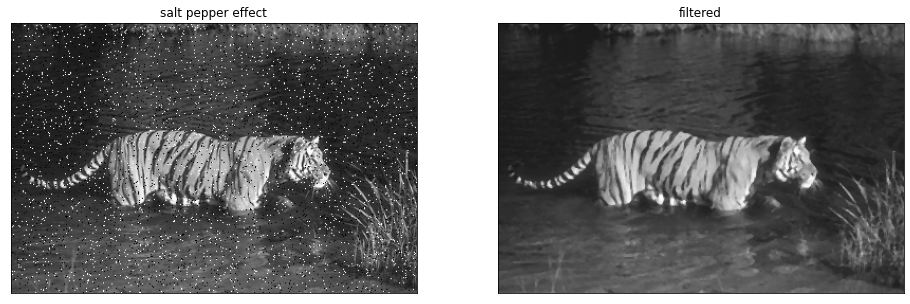

In [4]:
figure_size = 3

#aplicando filtro mediana a la imagen en blanco y negro
comienzo1_BW=time.time()
filtered_img_BW = cv2.medianBlur(img_BW, figure_size)
final1_BW=time.time()
showImages(img_BW,'salt pepper effect',filtered_img_BW,'filtered')


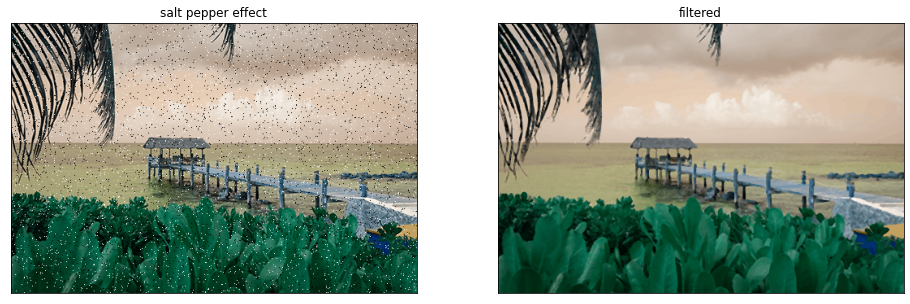

In [5]:
#aplicando filtro mediana a la imagen en color
comienzo1_color=time.time()
filtered_img_Color = cv2.medianBlur(img_Color, figure_size)
final1_color=time.time()
showImages(img_Color,'salt pepper effect',filtered_img_Color,'filtered')


# Aplicando filtro mediana mediante una función

In [6]:
def median_filter(data, filter_size):
    """
    Funcion que  filtra una matriz mediante el filtro  de mediana
    """
    temp = []
    indexer = filter_size // 2
    data_final = []
    rows=len(data)
    rows, columns = data.shape
    data_final = np.zeros((rows,columns))
    for i in range(rows):

        for j in range(columns):

            for z in range(filter_size):
                if i + z - indexer < 0 or i + z - indexer > rows - 1:
                    for c in range(filter_size):
                        temp.append(0)
                else:
                    if j + z - indexer < 0 or j + indexer > columns - 1:
                        temp.append(0)
                    else:
                        for k in range(filter_size):
                            temp.append(data[i + z - indexer][j + k - indexer])

            temp.sort()
            data_final[i][j] = temp[len(temp) // 2]
            temp = []
    return data_final

In [7]:
def filtrarImagen(img):
    """
    Funcion que recive una imagen lo divide en tres canales R GB  y a cada uno de ellos les aplica la funcion del filtro de mediana
    """
    img = img_as_float(img)
    r = img[:, :, 0]
    g = img[:, :, 1]
    b = img[:, :, 2]

    #aplicamos el filtro a cada canal
    newR=median_filter(r,3)
    newG=median_filter(g,3)
    newB=median_filter(b,3)
    #volvemos a juntar todos los canales
    rows,cols=r.shape
    mixed_image = np.zeros((rows,cols, 3))
    mixed_image[:,:,0]=newR
    mixed_image[:,:,1]=newG
    mixed_image[:,:,2]=newB
    return mixed_image

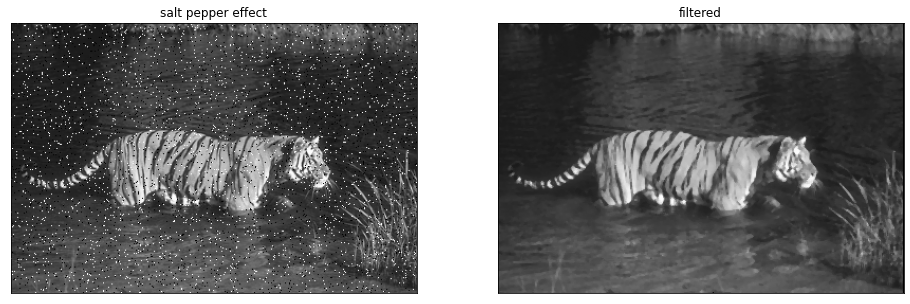

In [8]:
comienzo2_BW=time.time()
img1=filtrarImagen(img_BW)
final2_BW=time.time()
showImages(img_BW,'salt pepper effect',img1,'filtered')

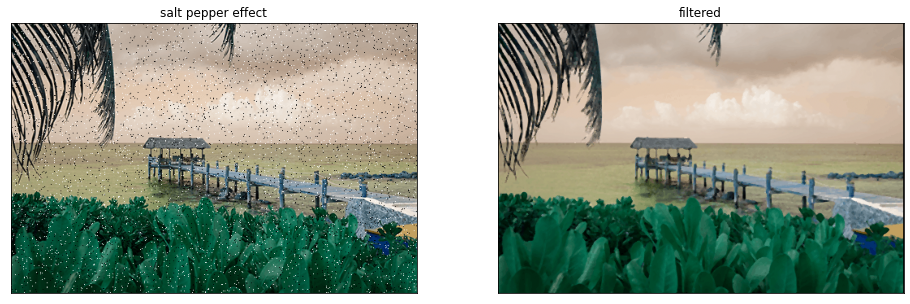

In [9]:
comienzo2_color=time.time()
img2=filtrarImagen(img_Color)
final2_color=time.time()
showImages(img_Color,'salt pepper effect',img2,'filtered')

# Comparación de tiempo requerido para filtrar la imagen

In [11]:
print("tiempo requerido por la funcion cv2.medianBlur")
print("Blanco y negro",final1_BW-comienzo1_BW,"color:",final1_color-comienzo1_color)
print()
print("tiempo requerido por la funcion manual")
print("Blanco y negro",final2_BW-comienzo2_BW,"color:",final2_color-comienzo2_color)

tiempo requerido por la funcion cv2.medianBlur
Blanco y negro 0.004996538162231445 color: 0.0

tiempo requerido por la funcion manual
Blanco y negro 2.3452799320220947 color: 4.0795066356658936


### CONTROL DE ACTIVIDAD GRUPAL 

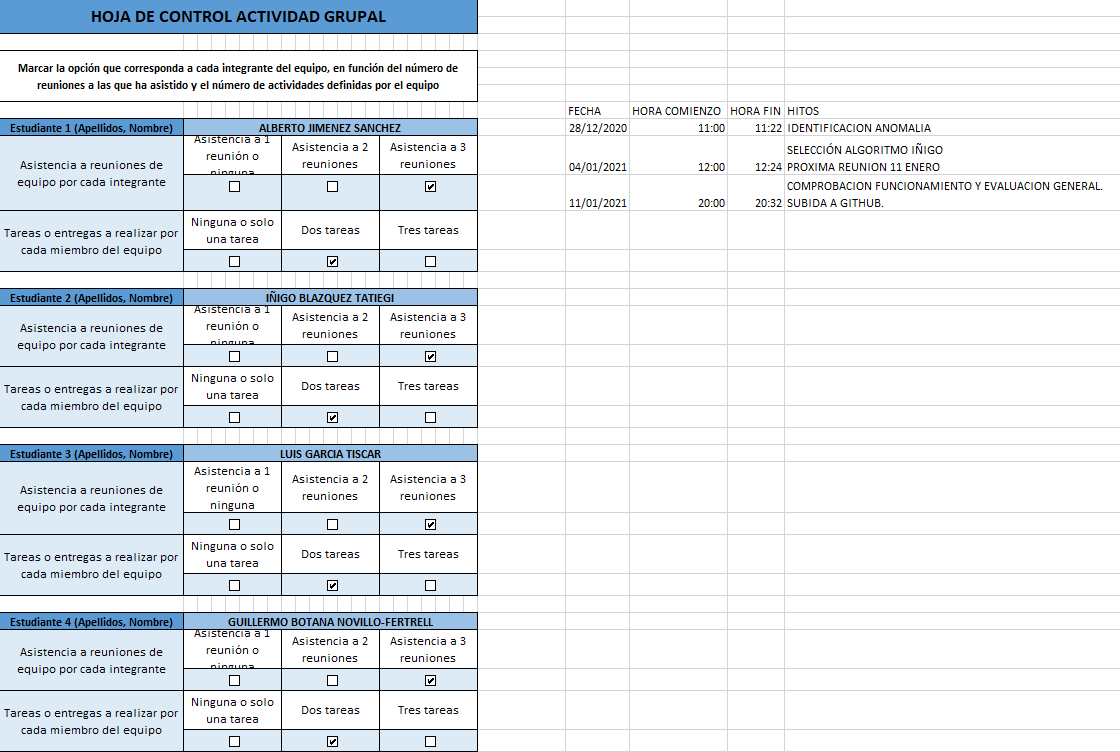

In [1]:
from IPython.display import Image
Image(filename = "imagenes/asistencia.png")